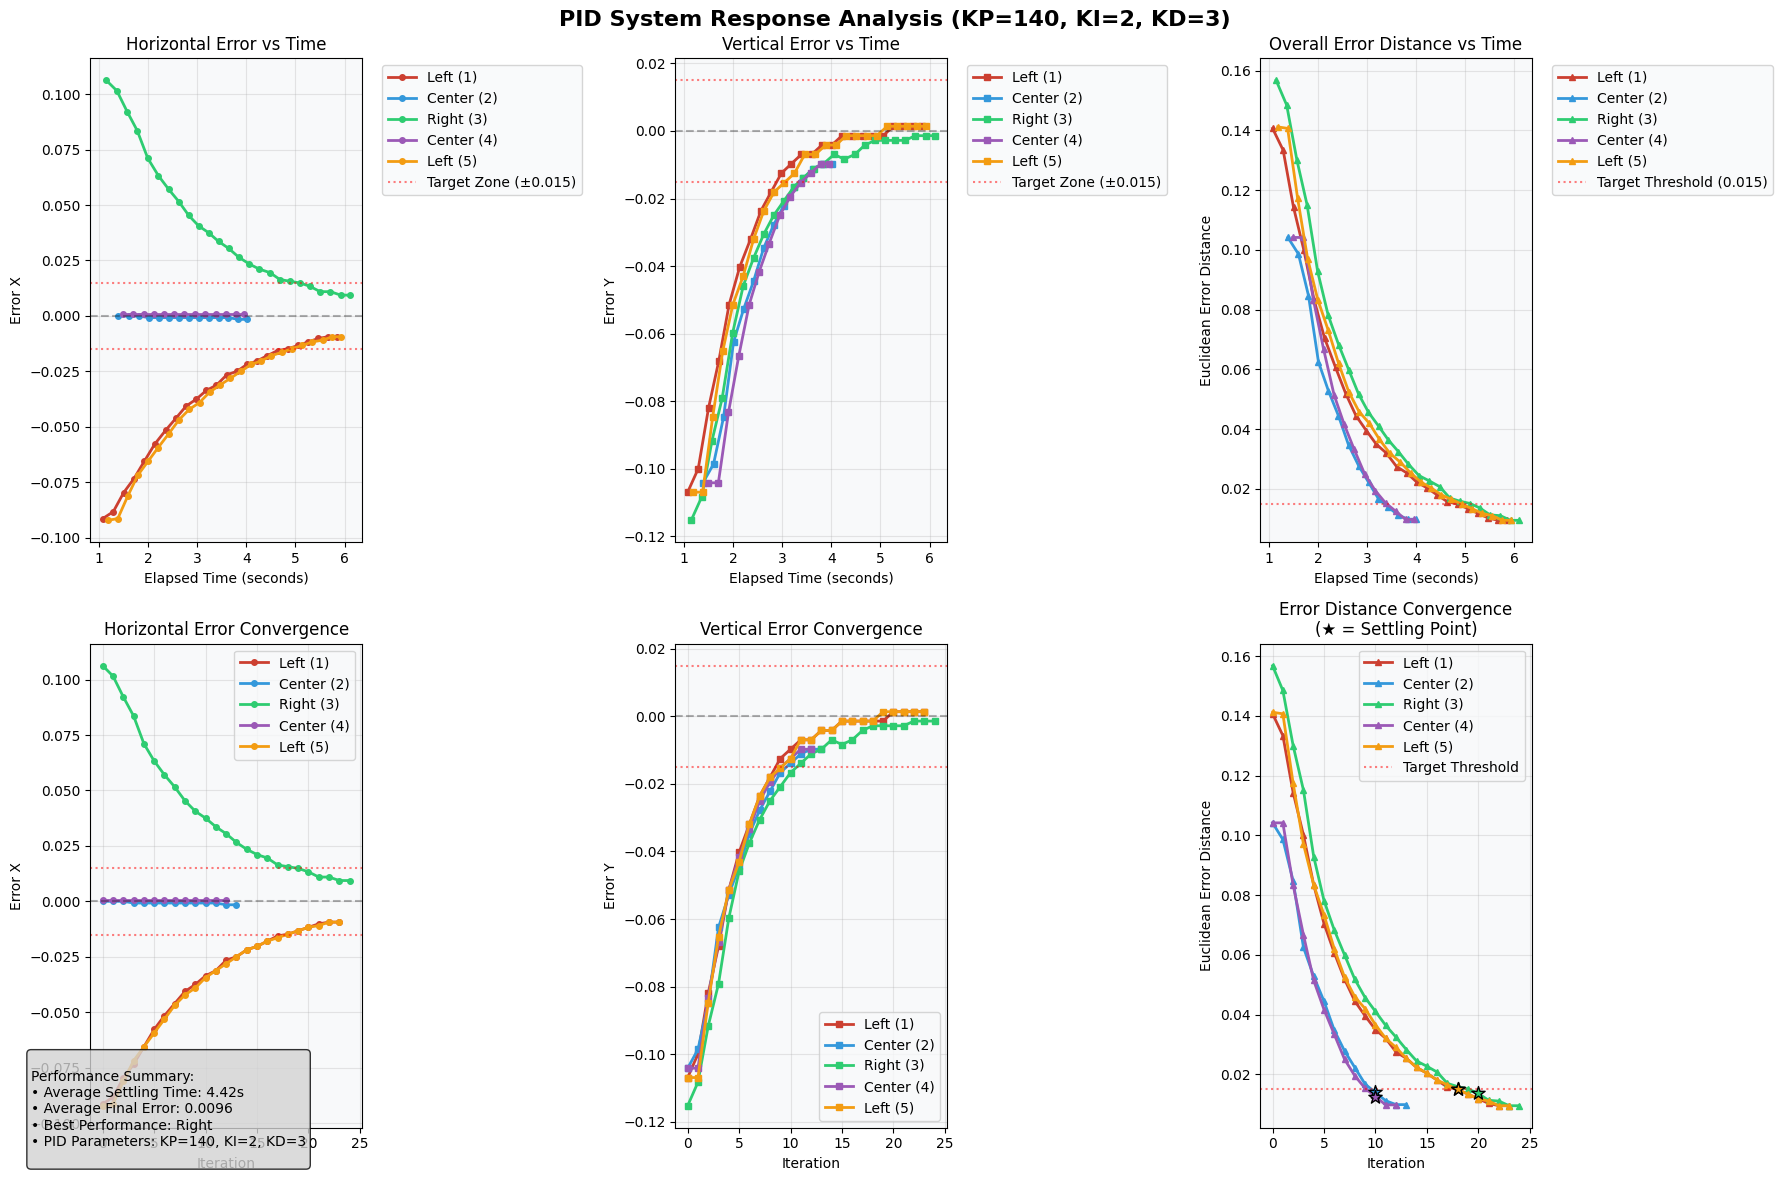

=== PID SYSTEM RESPONSE ANALYSIS ===
Number of targets: 5
Target sequence: left → center → right → center → left

Detailed Performance:

1. LEFT Target:
   • Total iterations: 24
   • Total time: 5.840s
   • Final error X: -0.0094
   • Final error Y: 0.0014
   • Final distance: 0.0095
   • Max error distance: 0.1407
   • Status: ✅ SUCCESSFULLY HIT

2. CENTER Target:
   • Total iterations: 14
   • Total time: 4.006s
   • Final error X: -0.0016
   • Final error Y: -0.0097
   • Final distance: 0.0098
   • Max error distance: 0.1042
   • Status: ✅ SUCCESSFULLY HIT

3. RIGHT Target:
   • Total iterations: 25
   • Total time: 6.102s
   • Final error X: 0.0094
   • Final error Y: -0.0014
   • Final distance: 0.0095
   • Max error distance: 0.1568
   • Status: ✅ SUCCESSFULLY HIT

4. CENTER Target:
   • Total iterations: 13
   • Total time: 3.957s
   • Final error X: 0.0008
   • Final error Y: -0.0097
   • Final distance: 0.0098
   • Max error distance: 0.1042
   • Status: ✅ SUCCESSFULLY HIT

5

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Set style for better looking plots without seaborn
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.size'] = 10

# Read CSV file
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\rec_track_1404_P50_I0_D0.csv')

# Calculate euclidean error distance
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# Get unique targets in order
targets = df['target_name'].unique()
target_order = ['left', 'center', 'right', 'center', 'left']

# Create colors for each target instance
colors = ["#CC3F30", '#3498DB', '#2ECC71', '#9B59B6', '#F39C12']
target_colors = dict(zip(range(len(target_order)), colors))

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('PID System Response Analysis (KP=140, KI=2, KD=3)', fontsize=16, fontweight='bold')

# Group data by target sequence
target_groups = []
current_target = None
current_group = []
group_index = 0

for idx, row in df.iterrows():
    if current_target != row['target_name']:
        if current_group:
            target_groups.append((target_order[group_index], current_group.copy(), group_index))
            group_index += 1
        current_target = row['target_name']
        current_group = []
    current_group.append(row)

# Add the last group
if current_group:
    target_groups.append((target_order[group_index], current_group.copy(), group_index))

# Plot 1: Error X vs Time for all targets
ax1 = axes[0, 0]
for target_name, group_data, group_idx in target_groups:
    group_df = pd.DataFrame(group_data)
    label = f'{target_name.capitalize()} ({group_idx+1})'
    ax1.plot(group_df['elapsed_time'], group_df['error_x'], 
            marker='o', linewidth=2, markersize=4, 
            color=target_colors[group_idx], label=label)

ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax1.axhline(y=0.015, color='red', linestyle=':', alpha=0.5, label='Target Zone (±0.015)')
ax1.axhline(y=-0.015, color='red', linestyle=':', alpha=0.5)
ax1.set_xlabel('Elapsed Time (seconds)')
ax1.set_ylabel('Error X')
ax1.set_title('Horizontal Error vs Time')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Error Y vs Time for all targets
ax2 = axes[0, 1]
for target_name, group_data, group_idx in target_groups:
    group_df = pd.DataFrame(group_data)
    label = f'{target_name.capitalize()} ({group_idx+1})'
    ax2.plot(group_df['elapsed_time'], group_df['error_y'], 
            marker='s', linewidth=2, markersize=4, 
            color=target_colors[group_idx], label=label)

ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax2.axhline(y=0.015, color='red', linestyle=':', alpha=0.5, label='Target Zone (±0.015)')
ax2.axhline(y=-0.015, color='red', linestyle=':', alpha=0.5)
ax2.set_xlabel('Elapsed Time (seconds)')
ax2.set_ylabel('Error Y')
ax2.set_title('Vertical Error vs Time')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# Plot 3: Euclidean Error Distance vs Time
ax3 = axes[0, 2]
for target_name, group_data, group_idx in target_groups:
    group_df = pd.DataFrame(group_data)
    label = f'{target_name.capitalize()} ({group_idx+1})'
    ax3.plot(group_df['elapsed_time'], group_df['error_distance'], 
            marker='^', linewidth=2, markersize=4, 
            color=target_colors[group_idx], label=label)

ax3.axhline(y=0.015, color='red', linestyle=':', alpha=0.5, label='Target Threshold (0.015)')
ax3.set_xlabel('Elapsed Time (seconds)')
ax3.set_ylabel('Euclidean Error Distance')
ax3.set_title('Overall Error Distance vs Time')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# Plot 4: Error X vs Iteration (normalized)
ax4 = axes[1, 0]
for target_name, group_data, group_idx in target_groups:
    group_df = pd.DataFrame(group_data)
    iterations = range(len(group_df))
    ax4.plot(iterations, group_df['error_x'], 
            marker='o', linewidth=2, markersize=4, 
            color=target_colors[group_idx], 
            label=f'{target_name.capitalize()} ({group_idx+1})')

ax4.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax4.axhline(y=0.015, color='red', linestyle=':', alpha=0.5)
ax4.axhline(y=-0.015, color='red', linestyle=':', alpha=0.5)
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Error X')
ax4.set_title('Horizontal Error Convergence')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Error Y vs Iteration (normalized)
ax5 = axes[1, 1]
for target_name, group_data, group_idx in target_groups:
    group_df = pd.DataFrame(group_data)
    iterations = range(len(group_df))
    ax5.plot(iterations, group_df['error_y'], 
            marker='s', linewidth=2, markersize=4, 
            color=target_colors[group_idx], 
            label=f'{target_name.capitalize()} ({group_idx+1})')

ax5.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax5.axhline(y=0.015, color='red', linestyle=':', alpha=0.5)
ax5.axhline(y=-0.015, color='red', linestyle=':', alpha=0.5)
ax5.set_xlabel('Iteration')
ax5.set_ylabel('Error Y')
ax5.set_title('Vertical Error Convergence')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Euclidean Distance vs Iteration with Convergence Analysis
ax6 = axes[1, 2]
settling_times = []
final_errors = []

for target_name, group_data, group_idx in target_groups:
    group_df = pd.DataFrame(group_data)
    iterations = range(len(group_df))
    
    ax6.plot(iterations, group_df['error_distance'], 
            marker='^', linewidth=2, markersize=4, 
            color=target_colors[group_idx], 
            label=f'{target_name.capitalize()} ({group_idx+1})')
    
    # Calculate settling time (time to reach within threshold)
    threshold = 0.015
    settling_idx = None
    for i, error in enumerate(group_df['error_distance']):
        if error <= threshold:
            settling_idx = i
            break
    
    if settling_idx is not None:
        settling_time = group_df.iloc[settling_idx]['elapsed_time']
        settling_times.append(settling_time)
        ax6.scatter(settling_idx, group_df.iloc[settling_idx]['error_distance'], 
                s=100, color=target_colors[group_idx], marker='*', 
                edgecolor='black', linewidth=1, zorder=5)
    
    final_errors.append(group_df['error_distance'].iloc[-1])

ax6.axhline(y=0.015, color='red', linestyle=':', alpha=0.5, label='Target Threshold')
ax6.set_xlabel('Iteration')
ax6.set_ylabel('Euclidean Error Distance')
ax6.set_title('Error Distance Convergence\n(★ = Settling Point)')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Add performance summary text
summary_text = f"""
Performance Summary:
• Average Settling Time: {np.mean(settling_times):.2f}s
• Average Final Error: {np.mean(final_errors):.4f}
• Best Performance: {target_order[np.argmin(final_errors)].capitalize()}
• PID Parameters: KP=140, KI=2, KD=3
"""

fig.text(0.02, 0.02, summary_text, fontsize=10, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))

plt.show()

# Print detailed analysis
print("=== PID SYSTEM RESPONSE ANALYSIS ===")
print(f"Number of targets: {len(target_groups)}")
print(f"Target sequence: {' → '.join(target_order)}")
print("\nDetailed Performance:")
for i, (target_name, group_data, group_idx) in enumerate(target_groups):
    group_df = pd.DataFrame(group_data)
    print(f"\n{i+1}. {target_name.upper()} Target:")
    print(f"   • Total iterations: {len(group_df)}")
    print(f"   • Total time: {group_df['elapsed_time'].iloc[-1]:.3f}s")
    print(f"   • Final error X: {group_df['error_x'].iloc[-1]:.4f}")
    print(f"   • Final error Y: {group_df['error_y'].iloc[-1]:.4f}")
    print(f"   • Final distance: {group_df['error_distance'].iloc[-1]:.4f}")
    print(f"   • Max error distance: {group_df['error_distance'].max():.4f}")
    
    # Check if target was successfully hit
    if group_df['fired'].iloc[-1] == 1:
        print(f"   • Status: ✅ SUCCESSFULLY HIT")
    else:
        print(f"   • Status: ❌ MISSED")

ValueError: Unrecognized marker style '★'

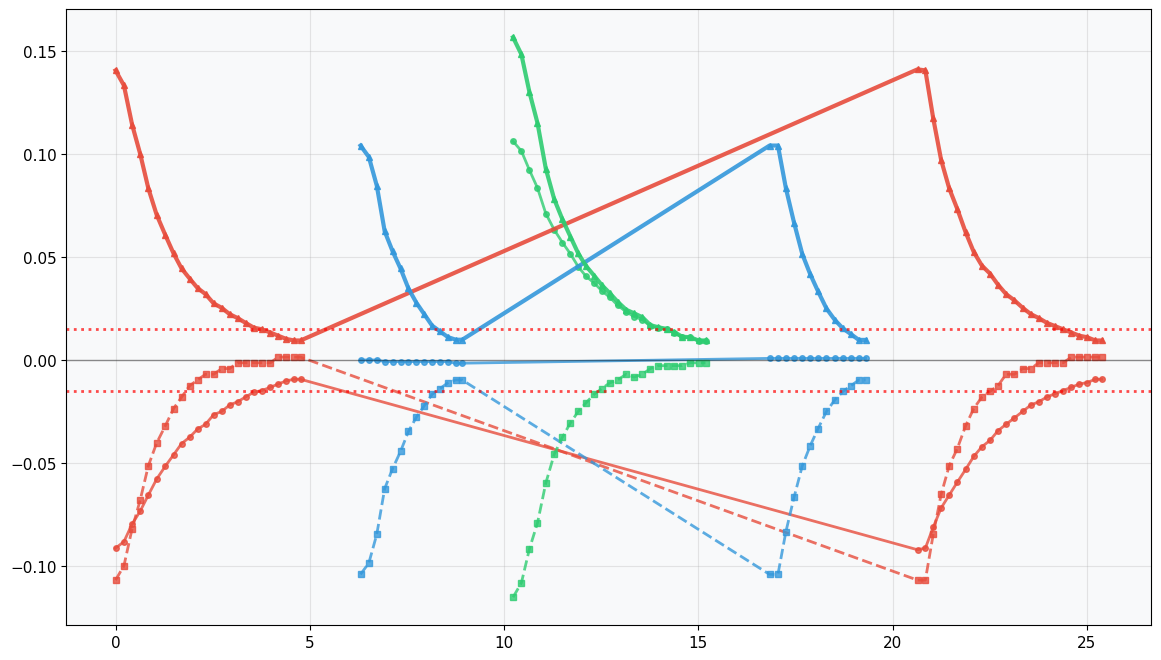

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import sqrt

# Set style for better looking plots
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.size'] = 11

# Read CSV file
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\rec_track_1404_P50_I0_D0.csv')

# Convert timestamp to datetime and calculate relative time
df['datetime'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
start_time = df['datetime'].iloc[0]
df['relative_time'] = (df['datetime'] - start_time).dt.total_seconds()

# Calculate euclidean error distance
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# Create colors for each target sequence
target_colors = {'left': '#E74C3C', 'center': '#3498DB', 'right': '#2ECC71'}

# Create the single plot
plt.figure(figsize=(14, 8))

# Plot error_x
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    plt.plot(target_data['relative_time'], target_data['error_x'], 
            'o-', linewidth=2, markersize=4, alpha=0.8,
            color=target_colors[target], label=f'Error X - {target.capitalize()}')

# Plot error_y with dashed lines
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    plt.plot(target_data['relative_time'], target_data['error_y'], 
            's--', linewidth=2, markersize=4, alpha=0.8,
            color=target_colors[target], label=f'Error Y - {target.capitalize()}')

# Plot euclidean distance with thicker lines
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    plt.plot(target_data['relative_time'], target_data['error_distance'], 
            '^-', linewidth=3, markersize=5, alpha=0.9,
            color=target_colors[target], label=f'Distance - {target.capitalize()}')

# Add reference lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.4, linewidth=1, label='Perfect Target (0)')
plt.axhline(y=0.015, color='red', linestyle=':', alpha=0.7, linewidth=2, label='Target Threshold (±0.015)')
plt.axhline(y=-0.015, color='red', linestyle=':', alpha=0.7, linewidth=2)

# Mark firing points
firing_points = df[df['fired'] == 1]
for _, point in firing_points.iterrows():
    plt.scatter(point['relative_time'], point['error_distance'], 
            s=150, color=target_colors[point['target_name']], 
            marker='★', edgecolor='black', linewidth=2, zorder=10)

# Customize the plot
plt.xlabel('Time from Start (seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Error Value', fontsize=12, fontweight='bold')
plt.title('PID System Error Analysis Over Time\n(KP=140, KI=2, KD=3)', 
        fontsize=14, fontweight='bold', pad=20)

# Customize legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid and styling
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add annotations for target sequence
target_sequence = []
current_target = None
for _, row in df.iterrows():
    if current_target != row['target_name']:
        target_sequence.append((row['relative_time'], row['target_name']))
        current_target = row['target_name']

# Add target labels on top
for i, (time, target) in enumerate(target_sequence):
    plt.annotate(f'{target.upper()}\n#{i+1}', 
                xy=(time, 0.08), 
                xytext=(time, 0.1),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=target_colors[target], alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.6))

# Add performance statistics
stats_text = f"""Performance Statistics:
• Total Time: {df['relative_time'].max():.1f} seconds
• Total Shots: {len(firing_points)} targets
• Avg Final Error: {firing_points['error_distance'].mean():.4f}
• Best Accuracy: {firing_points['error_distance'].min():.4f}
• Worst Accuracy: {firing_points['error_distance'].max():.4f}
★ = Firing Points"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.show()

# Print detailed timeline
print("=== DETAILED TIMELINE ANALYSIS ===")
print(f"Sequence: LEFT → CENTER → RIGHT → CENTER → LEFT")
print(f"Total duration: {df['relative_time'].max():.2f} seconds")
print("\nFiring Summary:")
for i, (_, point) in enumerate(firing_points.iterrows()):
    print(f"{i+1}. {point['target_name'].upper():>6} at {point['relative_time']:>6.2f}s | "
        f"Error: ({point['error_x']:>7.4f}, {point['error_y']:>7.4f}) | "
        f"Distance: {point['error_distance']:>6.4f}")

print(f"\nOverall Performance:")
print(f"• Average firing accuracy: {firing_points['error_distance'].mean():.4f}")
print(f"• Standard deviation: {firing_points['error_distance'].std():.4f}")
print(f"• All shots within threshold: {'✅ YES' if firing_points['error_distance'].max() <= 0.015 else '❌ NO'}")

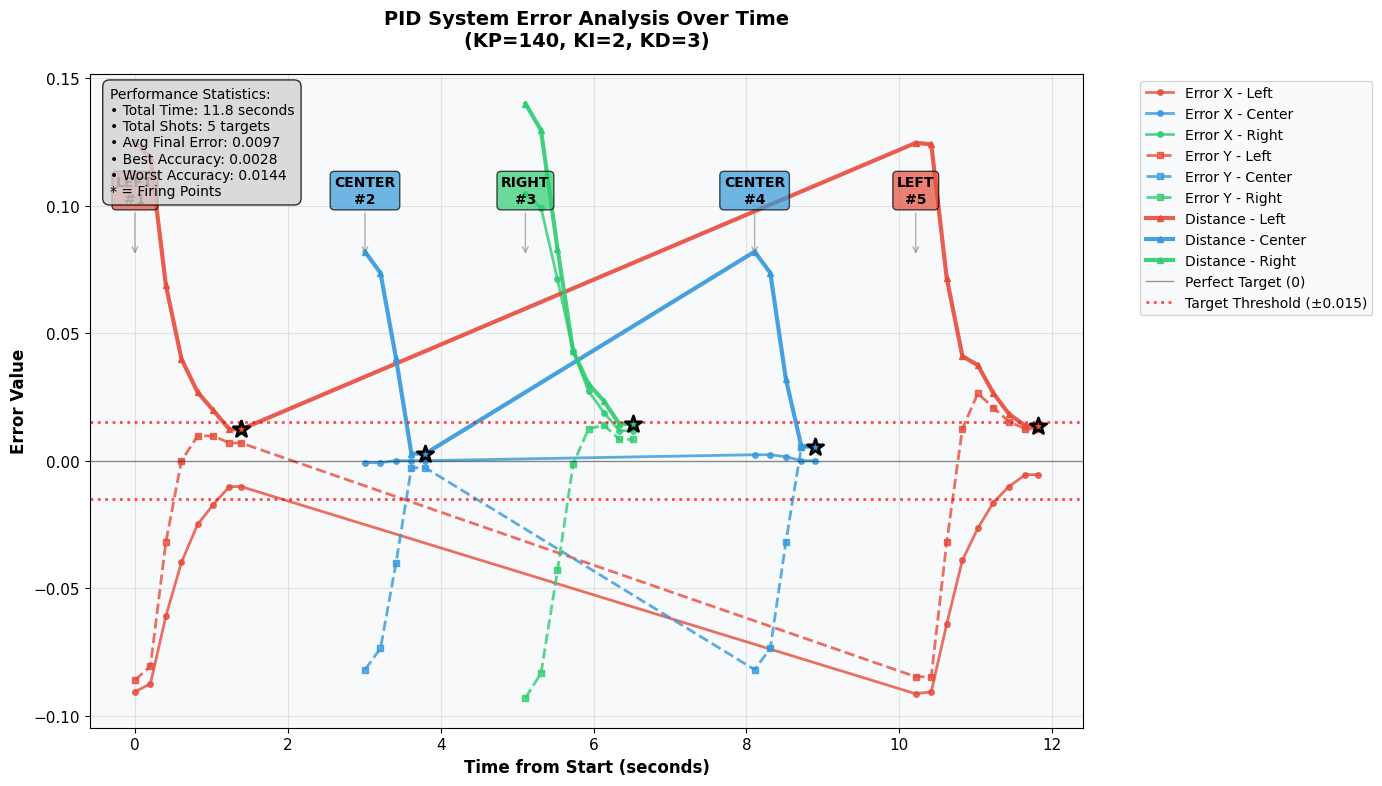

=== DETAILED TIMELINE ANALYSIS ===
Sequence: LEFT → CENTER → RIGHT → CENTER → LEFT
Total duration: 11.82 seconds

Firing Summary:
1.   LEFT at   1.39s | Error: (-0.0102,  0.0069) | Distance: 0.0123
2. CENTER at   3.80s | Error: ( 0.0000, -0.0028) | Distance: 0.0028
3.  RIGHT at   6.52s | Error: ( 0.0117,  0.0083) | Distance: 0.0144
4. CENTER at   8.90s | Error: ( 0.0000,  0.0056) | Distance: 0.0056
5.   LEFT at  11.82s | Error: (-0.0055,  0.0125) | Distance: 0.0136

Overall Performance:
• Average firing accuracy: 0.0097
• Standard deviation: 0.0052
• All shots within threshold: ✅ YES


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import sqrt

# Set style for better looking plots
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.size'] = 11

# Read CSV file
df = pd.read_csv('rec_track_1419_P140_I2_D3.csv')

# Convert timestamp to datetime and calculate relative time
df['datetime'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
start_time = df['datetime'].iloc[0]
df['relative_time'] = (df['datetime'] - start_time).dt.total_seconds()

# Calculate euclidean error distance
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# Create colors for each target sequence
target_colors = {'left': '#E74C3C', 'center': '#3498DB', 'right': '#2ECC71'}

# Create the single plot
plt.figure(figsize=(14, 8))

# Plot error_x
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    plt.plot(target_data['relative_time'], target_data['error_x'], 
            'o-', linewidth=2, markersize=4, alpha=0.8,
            color=target_colors[target], label=f'Error X - {target.capitalize()}')

# Plot error_y with dashed lines
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    plt.plot(target_data['relative_time'], target_data['error_y'], 
            's--', linewidth=2, markersize=4, alpha=0.8,
            color=target_colors[target], label=f'Error Y - {target.capitalize()}')

# Plot euclidean distance with thicker lines
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    plt.plot(target_data['relative_time'], target_data['error_distance'], 
            '^-', linewidth=3, markersize=5, alpha=0.9,
            color=target_colors[target], label=f'Distance - {target.capitalize()}')

# Add reference lines
plt.axhline(y=0, color='black', linestyle='-', alpha=0.4, linewidth=1, label='Perfect Target (0)')
plt.axhline(y=0.015, color='red', linestyle=':', alpha=0.7, linewidth=2, label='Target Threshold (±0.015)')
plt.axhline(y=-0.015, color='red', linestyle=':', alpha=0.7, linewidth=2)

# Mark firing points
firing_points = df[df['fired'] == 1]
for _, point in firing_points.iterrows():
    plt.scatter(point['relative_time'], point['error_distance'], 
            s=150, color=target_colors[point['target_name']], 
            marker='*', edgecolor='black', linewidth=2, zorder=10)

# Customize the plot
plt.xlabel('Time from Start (seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Error Value', fontsize=12, fontweight='bold')
plt.title('PID System Error Analysis Over Time\n(KP=140, KI=2, KD=3)', 
        fontsize=14, fontweight='bold', pad=20)

# Customize legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid and styling
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add annotations for target sequence
target_sequence = []
current_target = None
for _, row in df.iterrows():
    if current_target != row['target_name']:
        target_sequence.append((row['relative_time'], row['target_name']))
        current_target = row['target_name']

# Add target labels on top
for i, (time, target) in enumerate(target_sequence):
    plt.annotate(f'{target.upper()}\n#{i+1}', 
                xy=(time, 0.08), 
                xytext=(time, 0.1),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=target_colors[target], alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.6))

# Add performance statistics
stats_text = f"""Performance Statistics:
• Total Time: {df['relative_time'].max():.1f} seconds
• Total Shots: {len(firing_points)} targets
• Avg Final Error: {firing_points['error_distance'].mean():.4f}
• Best Accuracy: {firing_points['error_distance'].min():.4f}
• Worst Accuracy: {firing_points['error_distance'].max():.4f}
* = Firing Points"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.show()

# Print detailed timeline
print("=== DETAILED TIMELINE ANALYSIS ===")
print(f"Sequence: LEFT → CENTER → RIGHT → CENTER → LEFT")
print(f"Total duration: {df['relative_time'].max():.2f} seconds")
print("\nFiring Summary:")
for i, (_, point) in enumerate(firing_points.iterrows()):
    print(f"{i+1}. {point['target_name'].upper():>6} at {point['relative_time']:>6.2f}s | "
        f"Error: ({point['error_x']:>7.4f}, {point['error_y']:>7.4f}) | "
        f"Distance: {point['error_distance']:>6.4f}")

print(f"\nOverall Performance:")
print(f"• Average firing accuracy: {firing_points['error_distance'].mean():.4f}")
print(f"• Standard deviation: {firing_points['error_distance'].std():.4f}")
print(f"• All shots within threshold: {'✅ YES' if firing_points['error_distance'].max() <= 0.015 else '❌ NO'}")

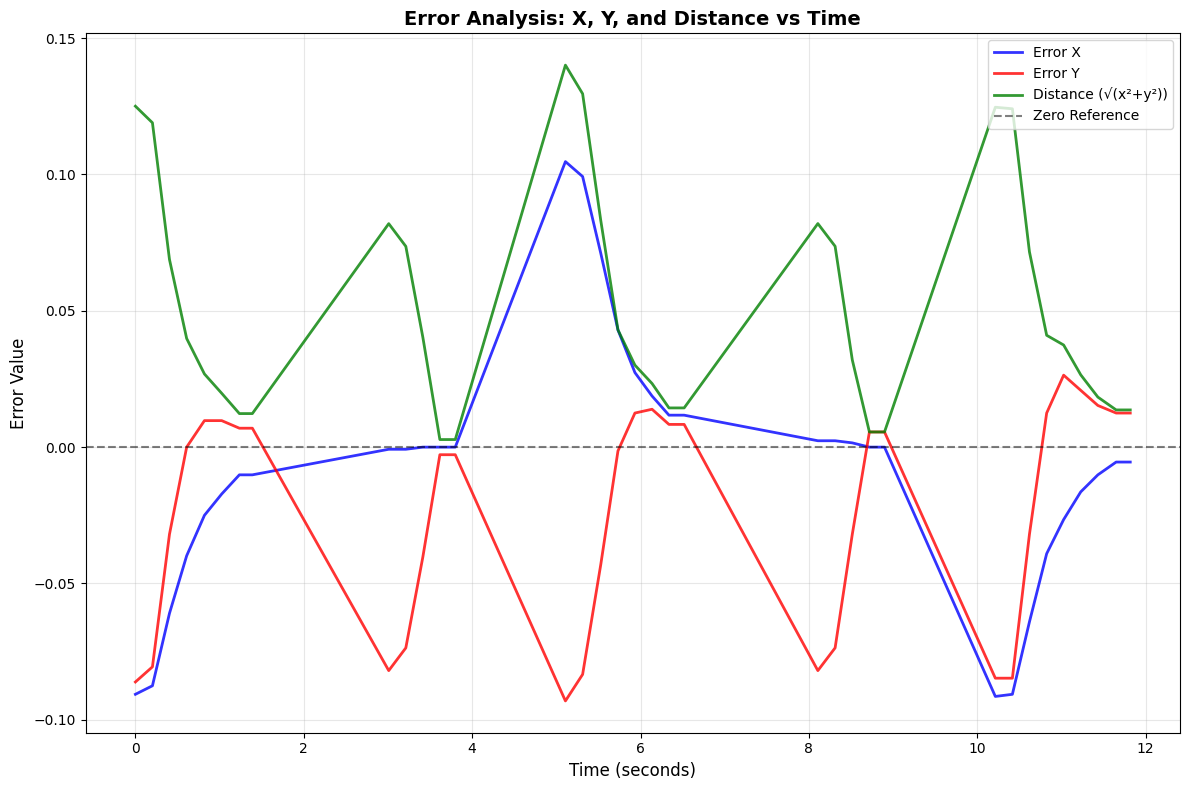

=== BASIC STATISTICS ===
Total time: 11.82 seconds
Data points: 35

Error X - Min: -0.0914, Max: 0.1047, Mean: -0.0085
Error Y - Min: -0.0931, Max: 0.0264, Mean: -0.0235
Distance - Min: 0.0028, Max: 0.1401, Mean: 0.0506


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style for clean plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Read CSV file
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\rec_track_1419_P140_I2_D3.csv')

# Convert timestamp to datetime and calculate relative time
df['datetime'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
start_time = df['datetime'].iloc[0]
df['relative_time'] = (df['datetime'] - start_time).dt.total_seconds()

# Calculate euclidean distance (sqrt)
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot error_x in blue
plt.plot(df['relative_time'], df['error_x'], 'b-', linewidth=2, label='Error X', alpha=0.8)

# Plot error_y in red
plt.plot(df['relative_time'], df['error_y'], 'r-', linewidth=2, label='Error Y', alpha=0.8)

# Plot euclidean distance in green
plt.plot(df['relative_time'], df['error_distance'], 'g-', linewidth=2, label='Distance (√(x²+y²))', alpha=0.8)

# Add horizontal reference line at zero
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Zero Reference')

# Customize the plot
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Error Value', fontsize=12)
plt.title('Error Analysis: X, Y, and Distance vs Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout and show
plt.tight_layout()
plt.show()

# Print basic statistics
print("=== BASIC STATISTICS ===")
print(f"Total time: {df['relative_time'].max():.2f} seconds")
print(f"Data points: {len(df)}")
print(f"\nError X - Min: {df['error_x'].min():.4f}, Max: {df['error_x'].max():.4f}, Mean: {df['error_x'].mean():.4f}")
print(f"Error Y - Min: {df['error_y'].min():.4f}, Max: {df['error_y'].max():.4f}, Mean: {df['error_y'].mean():.4f}")
print(f"Distance - Min: {df['error_distance'].min():.4f}, Max: {df['error_distance'].max():.4f}, Mean: {df['error_distance'].mean():.4f}")

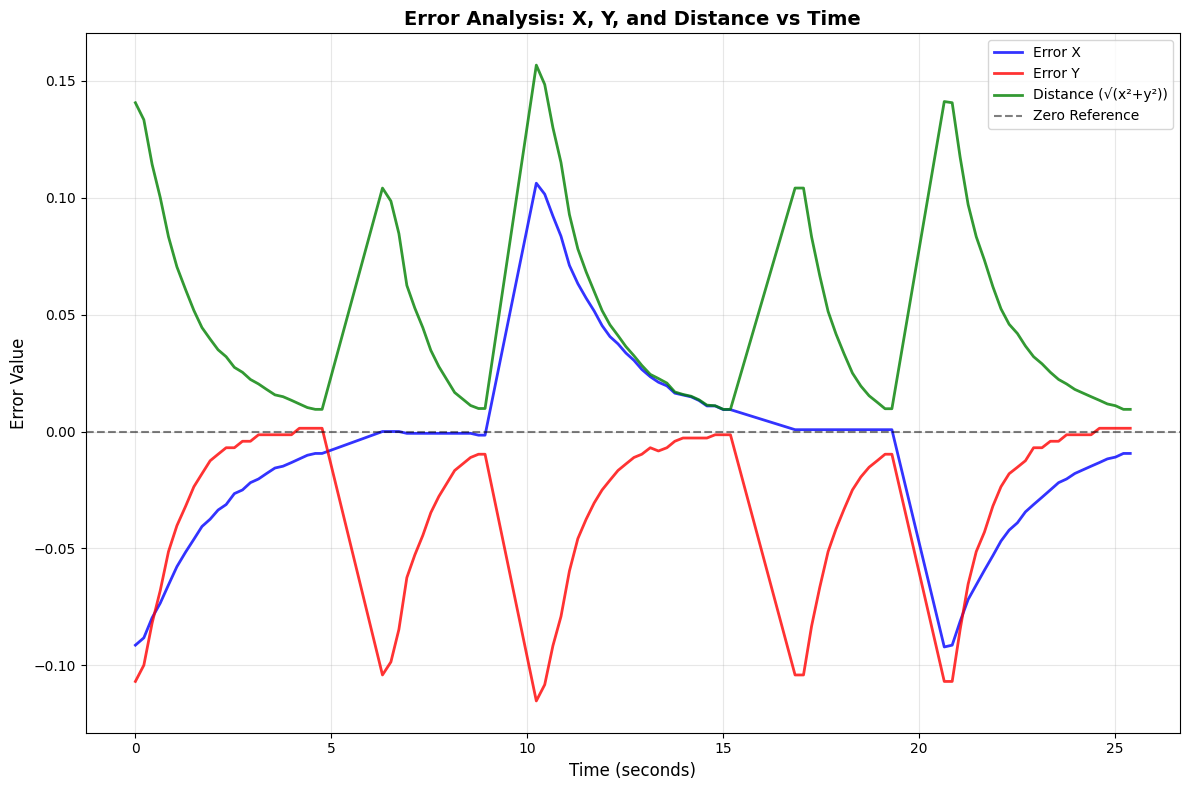

=== BASIC STATISTICS ===
Total time: 25.39 seconds
Data points: 100

Error X - Min: -0.0922, Max: 0.1062, Mean: -0.0080
Error Y - Min: -0.1153, Max: 0.0014, Mean: -0.0302
Distance - Min: 0.0095, Max: 0.1568, Mean: 0.0466


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style for clean plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Read CSV file
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\rec_track_1404_P50_I0_D0.csv')

# Convert timestamp to datetime and calculate relative time
df['datetime'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
start_time = df['datetime'].iloc[0]
df['relative_time'] = (df['datetime'] - start_time).dt.total_seconds()

# Calculate euclidean distance (sqrt)
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot error_x in blue
plt.plot(df['relative_time'], df['error_x'], 'b-', linewidth=2, label='Error X', alpha=0.8)

# Plot error_y in red
plt.plot(df['relative_time'], df['error_y'], 'r-', linewidth=2, label='Error Y', alpha=0.8)

# Plot euclidean distance in green
plt.plot(df['relative_time'], df['error_distance'], 'g-', linewidth=2, label='Distance (√(x²+y²))', alpha=0.8)

# Add horizontal reference line at zero
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Zero Reference')

# Customize the plot
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Error Value', fontsize=12)
plt.title('Error Analysis: X, Y, and Distance vs Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout and show
plt.tight_layout()
plt.show()

# Print basic statistics
print("=== BASIC STATISTICS ===")
print(f"Total time: {df['relative_time'].max():.2f} seconds")
print(f"Data points: {len(df)}")
print(f"\nError X - Min: {df['error_x'].min():.4f}, Max: {df['error_x'].max():.4f}, Mean: {df['error_x'].mean():.4f}")
print(f"Error Y - Min: {df['error_y'].min():.4f}, Max: {df['error_y'].max():.4f}, Mean: {df['error_y'].mean():.4f}")
print(f"Distance - Min: {df['error_distance'].min():.4f}, Max: {df['error_distance'].max():.4f}, Mean: {df['error_distance'].mean():.4f}")

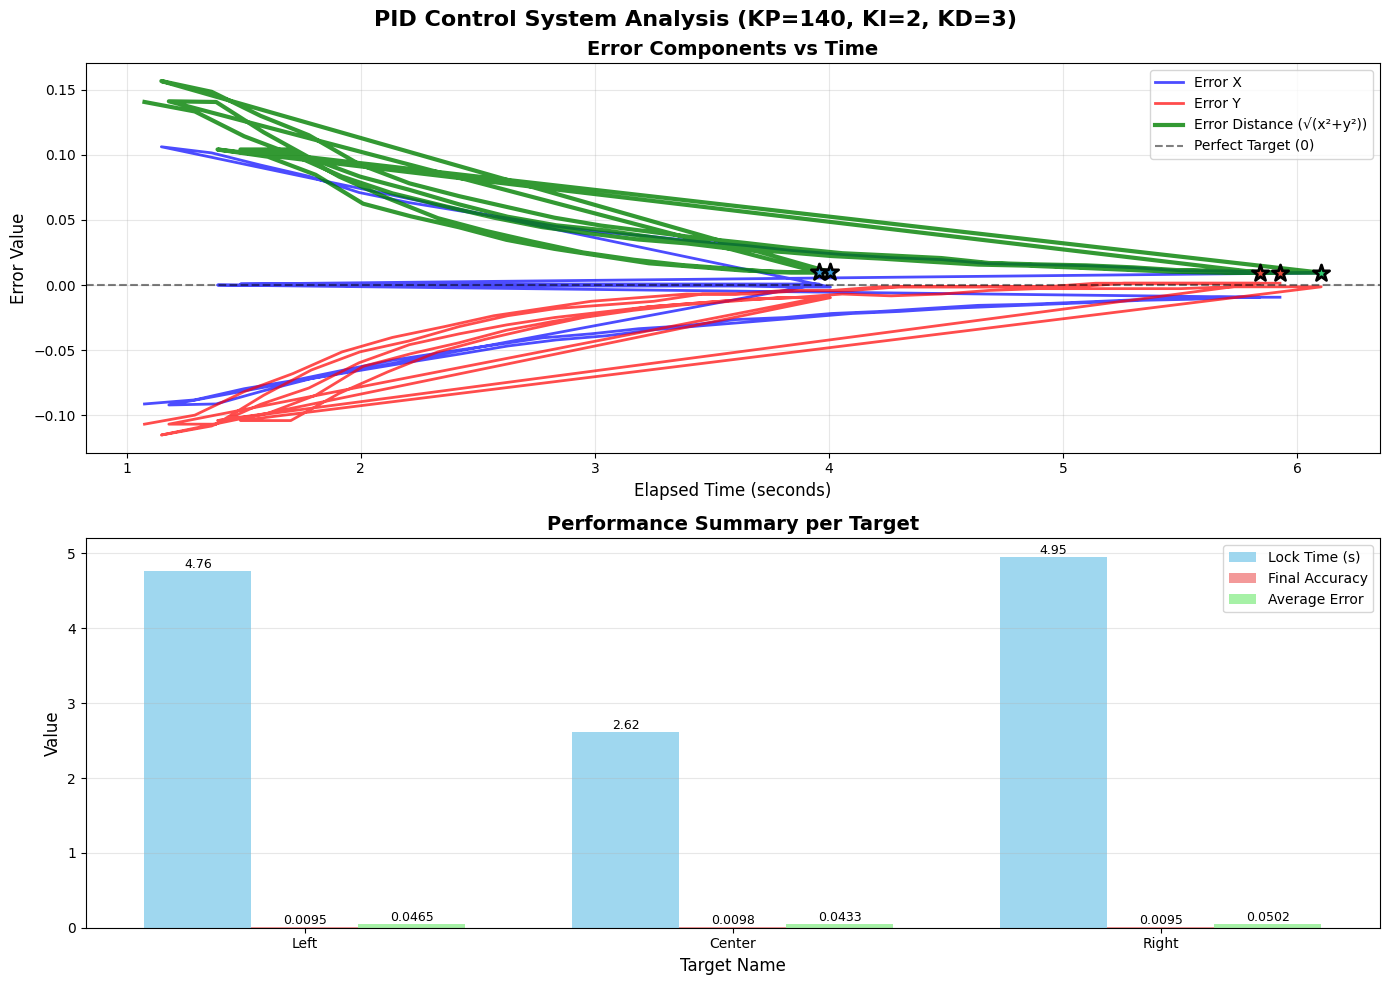

=== DETAILED PID PERFORMANCE ANALYSIS ===
PID Settings: KP=140, KI=2, KD=3
Total Test Duration: 6.10 seconds
Total Targets Engaged: 5

TARGET PERFORMANCE BREAKDOWN:
   LEFT: Lock Time = 4.76s, Final Accuracy = 0.0095, Avg Error = 0.0465
 CENTER: Lock Time = 2.62s, Final Accuracy = 0.0098, Avg Error = 0.0433
  RIGHT: Lock Time = 4.95s, Final Accuracy = 0.0095, Avg Error = 0.0502

OVERALL SYSTEM PERFORMANCE:
• Average Lock Time: 4.11 seconds
• Best Final Accuracy: 0.0095
• Worst Final Accuracy: 0.0098
• System Consistency: 0.0002 (lower = more consistent)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\rec_track_1404_P50_I0_D0.csv')

# คำนวณ error_distance จากสูตร Euclidean Distance
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# กำหนดสีสำหรับแต่ละเป้าหมาย
target_colors = {'left': '#E74C3C', 'center': '#3498DB', 'right': '#2ECC71'}

# สร้าง 2 กราห์แยกกัน
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('PID Control System Analysis (KP=140, KI=2, KD=3)', fontsize=16, fontweight='bold')

# =================
# กราฟที่ 1: Error Analysis
# =================
ax1.set_title('Error Components vs Time', fontsize=14, fontweight='bold')

# พลอตแต่ละ component ของ error
ax1.plot(df['elapsed_time'], df['error_x'], 'b-', linewidth=2, alpha=0.7, label='Error X')
ax1.plot(df['elapsed_time'], df['error_y'], 'r-', linewidth=2, alpha=0.7, label='Error Y') 
ax1.plot(df['elapsed_time'], df['error_distance'], 'g-', linewidth=3, alpha=0.8, label='Error Distance (√(x²+y²))')

# เพิ่มจุดที่ยิงเป้า (fired=1)
fired_points = df[df['fired'] == 1]
for _, point in fired_points.iterrows():
    ax1.scatter(point['elapsed_time'], point['error_distance'], 
            s=150, color=target_colors[point['target_name']], 
            marker='*', edgecolor='black', linewidth=2, zorder=10)

# เพิ่มเส้นอ้างอิงที่ y=0
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Perfect Target (0)')

# ตั้งค่า axes
ax1.set_xlabel('Elapsed Time (seconds)', fontsize=12)
ax1.set_ylabel('Error Value', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# =================
# กราฟที่ 2: Performance per Target
# =================
ax2.set_title('Performance Summary per Target', fontsize=14, fontweight='bold')

# คำนวณสถิติสำหรับแต่ละเป้าหมาย
target_stats = []
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    fired_data = target_data[target_data['fired'] == 1]
    
    if len(fired_data) > 0:
        # เวลาที่ใช้ในการล็อกเป้า
        lock_time = fired_data['elapsed_time'].iloc[0] - target_data['elapsed_time'].iloc[0]
        # ความแม่นยำขั้นสุดท้าย
        final_accuracy = fired_data['error_distance'].iloc[0]
        # ค่า error เฉลี่ย
        avg_error = target_data['error_distance'].mean()
        
        target_stats.append({
            'target': target,
            'lock_time': lock_time,
            'final_accuracy': final_accuracy,
            'avg_error': avg_error
        })

stats_df = pd.DataFrame(target_stats)

# สร้าง bar chart
x_pos = np.arange(len(stats_df))
width = 0.25

bars1 = ax2.bar(x_pos - width, stats_df['lock_time'], width, 
                label='Lock Time (s)', alpha=0.8, color='skyblue')
bars2 = ax2.bar(x_pos, stats_df['final_accuracy'], width, 
                label='Final Accuracy', alpha=0.8, color='lightcoral')
bars3 = ax2.bar(x_pos + width, stats_df['avg_error'], width, 
                label='Average Error', alpha=0.8, color='lightgreen')

ax2.set_xlabel('Target Name', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats_df['target'].str.capitalize())
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# เพิ่มค่าบนแต่ละแท่ง
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# แสดงสถิติรายละเอียด
print("=== DETAILED PID PERFORMANCE ANALYSIS ===")
print(f"PID Settings: KP=140, KI=2, KD=3")
print(f"Total Test Duration: {df['elapsed_time'].max():.2f} seconds")
print(f"Total Targets Engaged: {len(fired_points)}")
print()

print("TARGET PERFORMANCE BREAKDOWN:")
for _, row in stats_df.iterrows():
    print(f"{row['target'].upper():>7}: Lock Time = {row['lock_time']:.2f}s, "
        f"Final Accuracy = {row['final_accuracy']:.4f}, "
        f"Avg Error = {row['avg_error']:.4f}")

print()
print("OVERALL SYSTEM PERFORMANCE:")
print(f"• Average Lock Time: {stats_df['lock_time'].mean():.2f} seconds")
print(f"• Best Final Accuracy: {stats_df['final_accuracy'].min():.4f}")
print(f"• Worst Final Accuracy: {stats_df['final_accuracy'].max():.4f}")
print(f"• System Consistency: {stats_df['final_accuracy'].std():.4f} (lower = more consistent)")

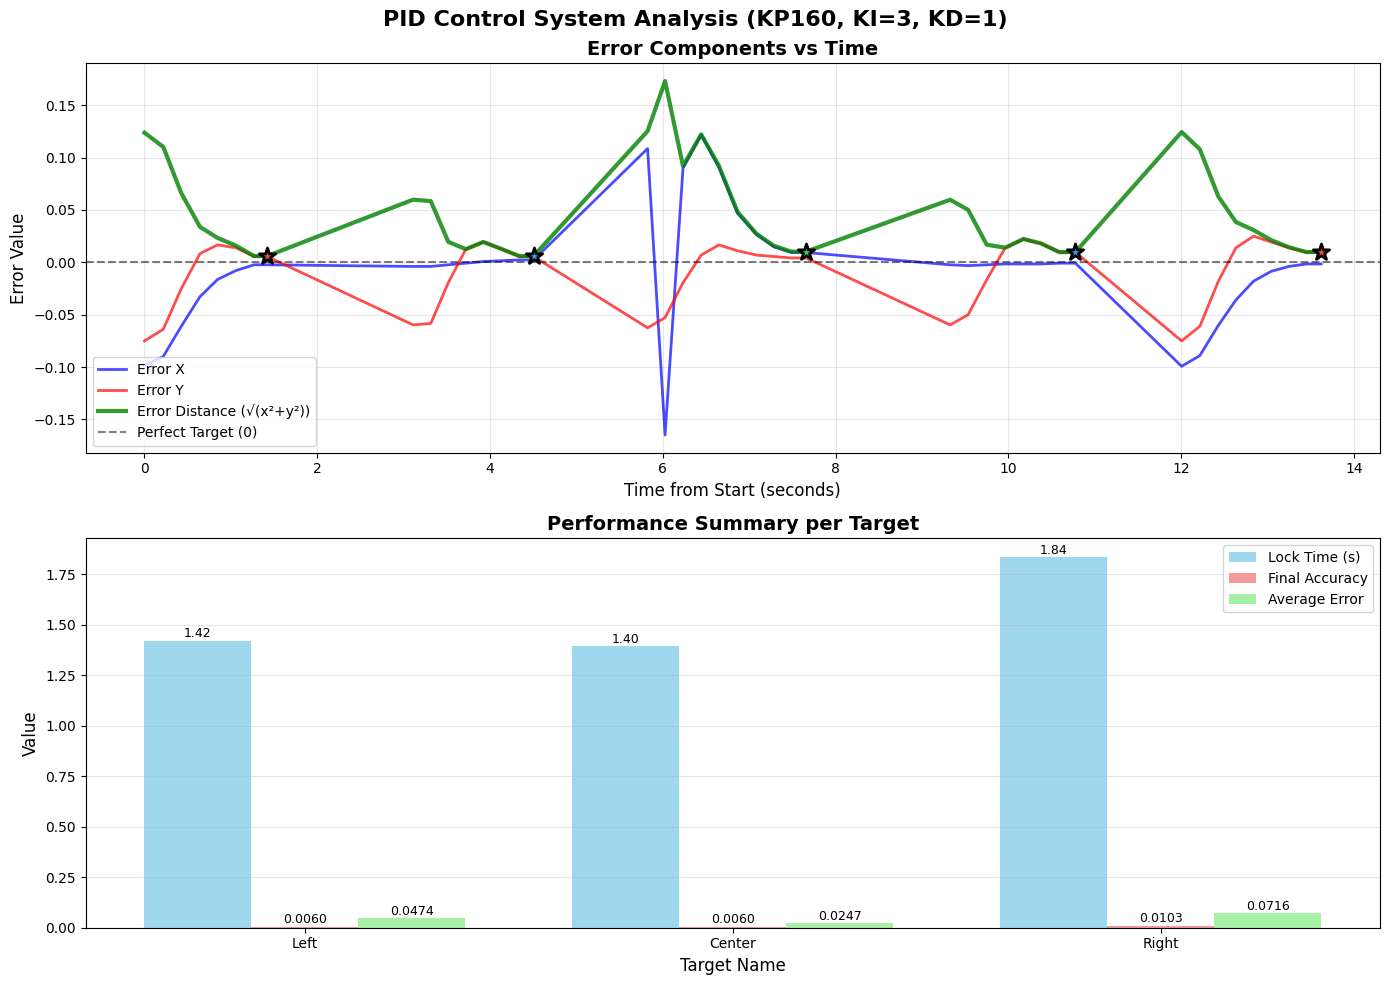

=== DETAILED PID PERFORMANCE ANALYSIS ===
PID Settings: KP=160, KI=3, KD=1
Test Start Time: 13:49:30.223569
Total Test Duration: 13.62 seconds
Total Targets Engaged: 5

TARGET PERFORMANCE BREAKDOWN:
   LEFT: Lock Time = 1.42s, Final Accuracy = 0.0060, Avg Error = 0.0474
 CENTER: Lock Time = 1.40s, Final Accuracy = 0.0060, Avg Error = 0.0247
  RIGHT: Lock Time = 1.84s, Final Accuracy = 0.0103, Avg Error = 0.0716

OVERALL SYSTEM PERFORMANCE:
• Average Lock Time: 1.55 seconds
• Best Final Accuracy: 0.0060
• Worst Final Accuracy: 0.0103
• System Consistency: 0.0024 (lower = more consistent)


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\robo_track_1349_P160_I3-0_D1.csv')

# แปลง timestamp เป็น datetime และคำนวณเวลาสัมพันธ์
df['datetime'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
start_time = df['datetime'].iloc[0]
df['relative_time'] = (df['datetime'] - start_time).dt.total_seconds()

# คำนวณ error_distance จากสูตร Euclidean Distance
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# กำหนดสีสำหรับแต่ละเป้าหมาย
target_colors = {'left': '#E74C3C', 'center': '#3498DB', 'right': '#2ECC71'}

# สร้าง 2 กราห์แยกกัน
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('PID Control System Analysis (KP160, KI=3, KD=1)', fontsize=16, fontweight='bold')

# =================
# กราฟที่ 1: Error Analysis
# =================
ax1.set_title('Error Components vs Time', fontsize=14, fontweight='bold')

# พลอตแต่ละ component ของ error
ax1.plot(df['relative_time'], df['error_x'], 'b-', linewidth=2, alpha=0.7, label='Error X')
ax1.plot(df['relative_time'], df['error_y'], 'r-', linewidth=2, alpha=0.7, label='Error Y') 
ax1.plot(df['relative_time'], df['error_distance'], 'g-', linewidth=3, alpha=0.8, label='Error Distance (√(x²+y²))')

# เพิ่มจุดที่ยิงเป้า (fired=1)
fired_points = df[df['fired'] == 1]
for _, point in fired_points.iterrows():
    ax1.scatter(point['relative_time'], point['error_distance'], 
            s=150, color=target_colors[point['target_name']], 
            marker='*', edgecolor='black', linewidth=2, zorder=10)

# เพิ่มเส้นอ้างอิงที่ y=0
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Perfect Target (0)')

# ตั้งค่า axes
ax1.set_xlabel('Time from Start (seconds)', fontsize=12)
ax1.set_ylabel('Error Value', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# =================
# กราฟที่ 2: Performance per Target
# =================
ax2.set_title('Performance Summary per Target', fontsize=14, fontweight='bold')

# คำนวณสถิติสำหรับแต่ละเป้าหมาย
target_stats = []
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    fired_data = target_data[target_data['fired'] == 1]
    
    if len(fired_data) > 0:
        # เวลาที่ใช้ในการล็อกเป้า
        lock_time = fired_data['relative_time'].iloc[0] - target_data['relative_time'].iloc[0]
        # ความแม่นยำขั้นสุดท้าย
        final_accuracy = fired_data['error_distance'].iloc[0]
        # ค่า error เฉลี่ย
        avg_error = target_data['error_distance'].mean()
        
        target_stats.append({
            'target': target,
            'lock_time': lock_time,
            'final_accuracy': final_accuracy,
            'avg_error': avg_error
        })

stats_df = pd.DataFrame(target_stats)

# สร้าง bar chart
x_pos = np.arange(len(stats_df))
width = 0.25

bars1 = ax2.bar(x_pos - width, stats_df['lock_time'], width, 
                label='Lock Time (s)', alpha=0.8, color='skyblue')
bars2 = ax2.bar(x_pos, stats_df['final_accuracy'], width, 
                label='Final Accuracy', alpha=0.8, color='lightcoral')
bars3 = ax2.bar(x_pos + width, stats_df['avg_error'], width, 
                label='Average Error', alpha=0.8, color='lightgreen')

ax2.set_xlabel('Target Name', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats_df['target'].str.capitalize())
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# เพิ่มค่าบนแต่ละแท่ง
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# แสดงสถิติรายละเอียด
print("=== DETAILED PID PERFORMANCE ANALYSIS ===")
print(f"PID Settings: KP=160, KI=3, KD=1")
print(f"Test Start Time: {df['timestamp'].iloc[0]}")
print(f"Total Test Duration: {df['relative_time'].max():.2f} seconds")
print(f"Total Targets Engaged: {len(fired_points)}")
print()

print("TARGET PERFORMANCE BREAKDOWN:")
for _, row in stats_df.iterrows():
    print(f"{row['target'].upper():>7}: Lock Time = {row['lock_time']:.2f}s, "
        f"Final Accuracy = {row['final_accuracy']:.4f}, "
        f"Avg Error = {row['avg_error']:.4f}")

print()
print("OVERALL SYSTEM PERFORMANCE:")
print(f"• Average Lock Time: {stats_df['lock_time'].mean():.2f} seconds")
print(f"• Best Final Accuracy: {stats_df['final_accuracy'].min():.4f}")
print(f"• Worst Final Accuracy: {stats_df['final_accuracy'].max():.4f}")
print(f"• System Consistency: {stats_df['final_accuracy'].std():.4f} (lower = more consistent)")

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv(r'D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Lab02\data\rec_track_1406_P150_I0_D0.csv')

# แปลง timestamp เป็น datetime และคำนวณเวลาสัมพันธ์
df['datetime'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')
start_time = df['datetime'].iloc[0]
df['relative_time'] = (df['datetime'] - start_time).dt.total_seconds()

# คำนวณ error_distance จากสูตร Euclidean Distance
df['error_distance'] = np.sqrt(df['error_x']**2 + df['error_y']**2)

# กำหนดสีสำหรับแต่ละเป้าหมาย
target_colors = {'left': '#E74C3C', 'center': '#3498DB', 'right': '#2ECC71'}

# สร้าง 2 กราห์แยกกัน
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('PID Control System Analysis (KP=140, KI=2, KD=3)', fontsize=16, fontweight='bold')

# =================
# กราฟที่ 1: Error Analysis
# =================
ax1.set_title('Error Components vs Time', fontsize=14, fontweight='bold')

# พลอตแต่ละ component ของ error
ax1.plot(df['relative_time'], df['error_x'], 'b-', linewidth=2, alpha=0.7, label='Error X')
ax1.plot(df['relative_time'], df['error_y'], 'r-', linewidth=2, alpha=0.7, label='Error Y') 
ax1.plot(df['relative_time'], df['error_distance'], 'g-', linewidth=3, alpha=0.8, label='Error Distance (√(x²+y²))')

# เพิ่มจุดที่ยิงเป้า (fired=1)
fired_points = df[df['fired'] == 1]
for _, point in fired_points.iterrows():
    ax1.scatter(point['relative_time'], point['error_distance'], 
            s=150, color=target_colors[point['target_name']], 
            marker='*', edgecolor='black', linewidth=2, zorder=10)

# เพิ่มเส้นอ้างอิงที่ y=0
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Perfect Target (0)')

# ตั้งค่า axes
ax1.set_xlabel('Time from Start (seconds)', fontsize=12)
ax1.set_ylabel('Error Value', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# =================
# กราฟที่ 2: Performance per Target
# =================
ax2.set_title('Performance Summary per Target', fontsize=14, fontweight='bold')

# คำนวณสถิติสำหรับแต่ละเป้าหมาย
target_stats = []
for target in df['target_name'].unique():
    target_data = df[df['target_name'] == target]
    fired_data = target_data[target_data['fired'] == 1]
    
    if len(fired_data) > 0:
        # เวลาที่ใช้ในการล็อกเป้า
        lock_time = fired_data['relative_time'].iloc[0] - target_data['relative_time'].iloc[0]
        # ความแม่นยำขั้นสุดท้าย
        final_accuracy = fired_data['error_distance'].iloc[0]
        # ค่า error เฉลี่ย
        avg_error = target_data['error_distance'].mean()
        
        target_stats.append({
            'target': target,
            'lock_time': lock_time,
            'final_accuracy': final_accuracy,
            'avg_error': avg_error
        })

stats_df = pd.DataFrame(target_stats)

# สร้าง bar chart
x_pos = np.arange(len(stats_df))
width = 0.25

bars1 = ax2.bar(x_pos - width, stats_df['lock_time'], width, 
                label='Lock Time (s)', alpha=0.8, color='skyblue')
bars2 = ax2.bar(x_pos, stats_df['final_accuracy'], width, 
                label='Final Accuracy', alpha=0.8, color='lightcoral')
bars3 = ax2.bar(x_pos + width, stats_df['avg_error'], width, 
                label='Average Error', alpha=0.8, color='lightgreen')

ax2.set_xlabel('Target Name', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats_df['target'].str.capitalize())
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# เพิ่มค่าบนแต่ละแท่ง
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.2f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# แสดงสถิติรายละเอียด
print("=== DETAILED PID PERFORMANCE ANALYSIS ===")
print(f"PID Settings:KP=140, KI=2, KD=3")
print(f"Test Start Time: {df['timestamp'].iloc[0]}")
print(f"Total Test Duration: {df['relative_time'].max():.2f} seconds")
print(f"Total Targets Engaged: {len(fired_points)}")3

print("TARGET PERFORMANCE BREAKDOWN:")
for _, row in stats_df.iterrows():
    print(f"{row['target'].upper():>7}: Lock Time = {row['lock_time']:.2f}s, "
        f"Final Accuracy = {row['final_accuracy']:.4f}, "
        f"Avg Error = {row['avg_error']:.4f}")

print()
print("OVERALL SYSTEM PERFORMANCE:")
print(f"• Average Lock Time: {stats_df['lock_time'].mean():.2f} seconds")
print(f"• Best Final Accuracy: {stats_df['final_accuracy'].min():.4f}")
print(f"• Worst Final Accuracy: {stats_df['final_accuracy'].max():.4f}")
print(f"• System Consistency: {stats_df['final_accuracy'].std():.4f} (lower = more consistent)")

SyntaxError: invalid syntax (997134761.py, line 119)